In [1]:
import time 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm


In [188]:
import scikitplot as skplt # new cool plotting package

In [3]:
df = pd.read_csv('grouped.csv')

In [210]:
df = df.drop(['index'],axis = 1)

In [211]:
df = df.drop(['Unnamed: 0'],axis = 1) 

In [212]:
df = df.drop(['Unnamed: 0.1'],axis = 1)

In [8]:
df['category_id'] = df['category_id'].astype(int)

In [215]:
df = df.drop(['category_name'],axis = 1)

In [216]:
x = df.drop('catId', axis=1)
y = df.catId

In [217]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)

In [24]:
results = pd.DataFrame()

In [25]:
def evaluate(test, pred, model):
    return [model, 
            precision_score(test, pred, average = 'weighted'), 
            recall_score(test, pred,average = 'weighted'), 
            accuracy_score(test, pred), 
            f1_score(test, pred, average = 'weighted')]

In [26]:
def print_accuracy_indices(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average = 'weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = 'weighted')))

## Baseline Model

In [218]:
import numpy as np
from sklearn.dummy import DummyClassifier
start = time.time()
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_test, y_test)
DummyClassifier(strategy='most_frequent')
dummy_clf.score(x_test, y_test)
baseline_runtime = time.time() - start

In [219]:
dummypred = dummy_clf.predict(x_test)

In [220]:
a0 = evaluate(y_test, dummypred, 'Baseline')

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [221]:
a0

['Baseline',
 0.0865560769636059,
 0.2942041416493077,
 0.2942041416493077,
 0.13375954252982158]

# K-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 
  
accuracy = knn.score(x_test, y_test) 
print (accuracy) 
  
knn_predictions = knn.predict(x_test)  

0.8380031812064114


In [28]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 16):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='weighted')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [29]:
find_best_k(x_train, y_train, x_test, y_test, min_k=1, max_k=25)

Best Value for k: 1
F1-Score: 0.9568216577126079


In [30]:
a = evaluate(y_test, knn_predictions, 'K Nearest Neighbors')

##### Best K is 1 for KNN model

In [31]:
start = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(x_train, y_train)
knn_runtime = time.time() - start

In [32]:
knn_pred = knn_classifier.predict(x_test)
print_accuracy_indices(y_test, knn_pred)

Precision Score: 0.9569298997780931
Recall Score: 0.956809005261226
Accuracy Score: 0.956809005261226
F1 Score: 0.9568216577126079


## Random Forest

In [222]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rfclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [223]:
# Predicting the Test set results
rfy_pred = rfclassifier.predict(x_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, rfy_pred, rownames=['Actual'], colnames=['Predicted']))

Predicted    0     1    2    3    4    5     6    7
Actual                                             
0          587    13    3    9    7    1     5    7
1           12  2336    9   11    9    3     5   16
2            5    49  818    8    3    1     2    3
3            6    40   13  754    3    0     6    4
4            0    25    4    6  480    1     2    2
5            4    26    3    4    8  540     1    1
6            5    16    5    8    0    1  1273    1
7            7    29    3   15    0    1     4  938


In [224]:
start = time.time()
rfclassifier = RandomForestClassifier(n_estimators=100)
rfclassifier.fit(x_train, y_train)
rf_runtime = time.time() - start

In [225]:
rf_pred = rfclassifier.predict(x_test)  
print_accuracy_indices(y_test, rf_pred)

Precision Score: 0.9676960408880195
Recall Score: 0.9674059551525548
Accuracy Score: 0.9674059551525548
F1 Score: 0.9673612200060568


In [96]:
feature_importances = pd.DataFrame(rfclassifier.feature_importances_,
                                   index = x.columns,
                                columns=['importance']).sort_values('importance', ascending=False)

In [129]:
f = feature_importances.head(20)

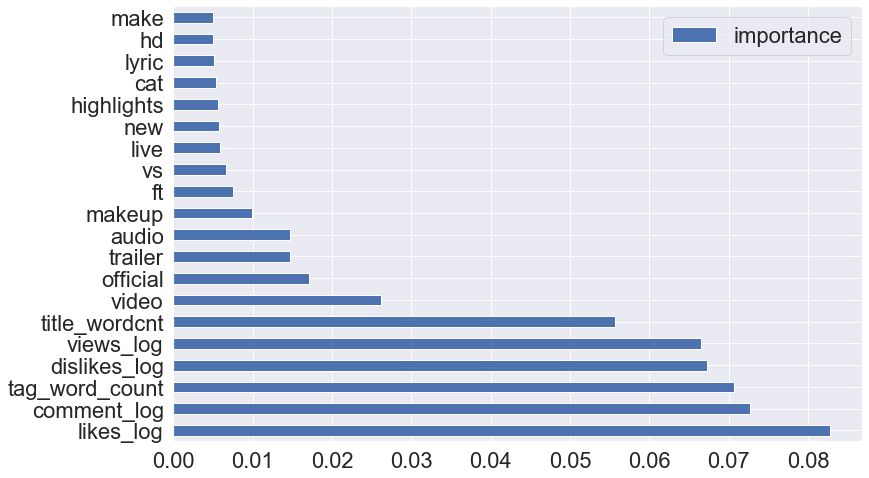

In [133]:
f.plot(kind="barh")

In [40]:
b = evaluate(y_test, rf_pred, "Random Forest")

# Adaptive Boosting Tree

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
start = time.time()
adaboost_clf = AdaBoostClassifier()
adaboost_clf.fit(x_train, y_train)
ab_runtime = time.time() - start
ab_pred = adaboost_clf.predict(x_test)
print_accuracy_indices(y_test, ab_pred)

Precision Score: 0.2605583246283081
Recall Score: 0.36131163587422
Accuracy Score: 0.36131163587422
F1 Score: 0.2337035225400212


/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
pd.crosstab(y_test, ab_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,5,6,All
True,,,,
-1,4,5,0,9
0,600,1,23,624
1,2483,6,37,2526
2,861,3,20,884
3,821,5,3,829
4,488,0,9,497
5,544,29,2,575
6,812,6,441,1259
7,954,3,13,970


In [48]:
c = evaluate(y_test, ab_pred, 'Adapative Boosting Tree')

## Gradient Boosting

In [49]:
start = time.time()
gbt_clf = GradientBoostingClassifier()
gbt_clf.fit(x_train, y_train)
gb_runtime = time.time() - start
gb_pred = gbt_clf.predict(x_test)
print_accuracy_indices(y_test, gb_pred)

Precision Score: 0.7571430652610677
Recall Score: 0.6476202128961214
Accuracy Score: 0.6476202128961214
F1 Score: 0.6350504258079539


In [50]:
d = evaluate(y_test, gb_pred, 'Gradient Boosting')


## SVM

In [139]:
svm_train, svm_test, svmy_train, svmy_test = train_test_split(x, y, test_size = 0.2)


In [140]:
start = time.time()
svm_clf = svm.NuSVC(kernel='rbf',nu=0.01)
svm_clf.fit(svm_train, svmy_train)
svm_runtime = time.time() - start
svm_runtime

101.72239780426025

In [96]:
#As a matter of fact, Looped from 1. to 0.1 (decreasing in decimal units) 
#and still got the error, then just tried with 0.01 and no complaints arose. 
#But of course, you should check the results of fitting your model with that value

In [143]:
svm_pred = svm_clf.predict(svm_test)
print_accuracy_indices(svmy_test, svm_pred)

Precision Score: 0.32215277989349744
Recall Score: 0.2494799951058363
Accuracy Score: 0.2494799951058363
F1 Score: 0.2496993358357868


In [144]:
e = evaluate(y_test, svm_pred, 'SVM')

## Decision Trees

In [145]:
start = time.time()
dt_classifier = DecisionTreeClassifier()  
dt_classifier.fit(x_train, y_train) 
dt_runtime = time.time() - start

In [146]:
dt_pred = dt_classifier.predict(x_test)  
print_accuracy_indices(y_test, dt_pred)

Precision Score: 0.8929571322485155
Recall Score: 0.892328398384926
Accuracy Score: 0.892328398384926
F1 Score: 0.892498289816673


In [147]:
f = evaluate(y_test, dt_pred, 'Decision Tree')

## Naive Bayes Classifer


Naive Bayes classifier – Naive Bayes classification method is based on Bayes’ theorem. It is termed as ‘Naive’ because it assumes independence between every pair of feature in the data. Let (x1, x2, …, xn) be a feature vector and y be the class label corresponding to this feature vector.

In [148]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
start = time.time()
gnb = GaussianNB().fit(x_train, y_train) 
gnb_predictions = gnb.predict(x_test) 
# accuracy on X_test 
accuracy = gnb.score(x_test, y_test) 
nb_runtime = time.time() - start

print (accuracy) 
# creating a confusion matrix 
nbcm = confusion_matrix(y_test, gnb_predictions)


0.3997308209959623


In [149]:
nbpred = gnb.predict(x_test)  
print_accuracy_indices(y_test, gnb_predictions)

Precision Score: 0.6322324645854984
Recall Score: 0.3997308209959623
Accuracy Score: 0.3997308209959623
F1 Score: 0.42163220349055036


In [53]:
g = evaluate(y_test, nbpred, 'Naive Bayes')


## Multinomial NB

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [55]:
start = time.time()
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_runtime = time.time() - start
mnb_runtime

0.1369330883026123

In [57]:
mnb_pred = mnb.predict(x_test)
print_accuracy_indices(y_test, mnb_pred)

Precision Score: 0.5140623422043068
Recall Score: 0.4098862106937477
Accuracy Score: 0.4098862106937477
F1 Score: 0.3797514010547937


/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
h = evaluate(y_test, mnb_pred, 'Multinomial Naive Bayes')


## Bagging

In [150]:
start = time.time()
bt_classifier = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=100)
bt_classifier.fit(x_train, y_train)
bt_runtime = time.time() - start

In [153]:
bt_pred = bt_classifier.predict(x_test)
print_accuracy_indices(y_test, bt_pred)

Precision Score: 0.5418965048583988
Recall Score: 0.40633794200416
Accuracy Score: 0.40633794200416
F1 Score: 0.2923428977803924


/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [154]:
i = evaluate(y_test, bt_pred, 'Bagged Trees')


## PCA

Text(0, 0.5, 'Cumulative explained variance')

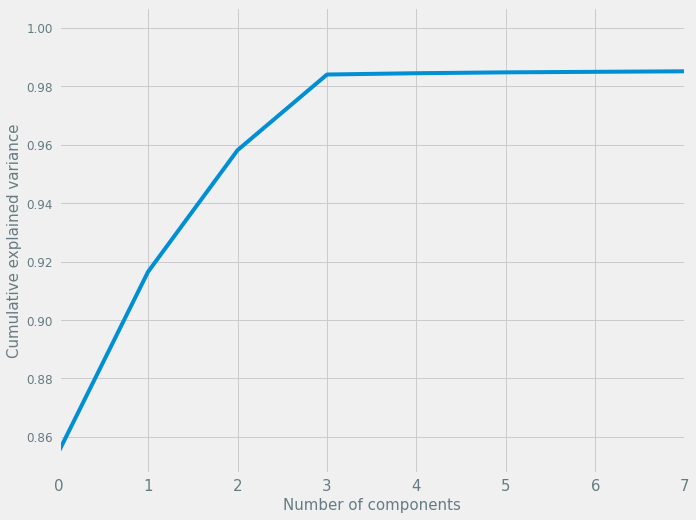

In [85]:
from sklearn.decomposition import PCA
plt.figure(figsize=(10, 8))
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.tick_params(labelsize=12)
plt.xticks(size=15)
plt.xlabel('Number of components', size =15)
plt.ylabel('Cumulative explained variance',size =15)

In [75]:
df2 = pd.read_csv('grouped.csv')

In [40]:
x_pca = pca.transform(x)
x_pca

array([[-2.81578519e+00, -1.02758819e+00,  6.17249686e-01, ...,
        -3.77803394e-03,  5.85309683e-03,  7.69643144e-03],
       [-3.84018876e+00, -7.58590721e-04,  5.07824017e-01, ...,
        -1.94875101e-02,  1.55695014e-02,  1.68063545e-02],
       [-3.89097294e+00,  4.13253974e-01, -2.84209488e-02, ...,
         3.87477452e-03, -2.70899421e-03,  5.19460835e-03],
       ...,
       [-1.62816477e+00, -2.22789927e-01, -3.24415503e-01, ...,
         1.82766642e-02,  2.87805497e-02, -3.26814067e-02],
       [-4.22777364e+00,  5.11965897e-02, -5.44101864e-01, ...,
         6.76564331e-02,  4.98465266e-04,  9.95142424e-03],
       [-8.18689890e+00,  2.67195217e-01,  2.27465283e+00, ...,
         9.61462424e-03,  1.88805441e-03, -2.32879181e-02]])

## Results Table 

In [155]:
results = pd.DataFrame()

In [156]:
results = results.append([a0, a, b, c, d, e, f, g, h, i])
results.columns = ['Model', 'Precision Score', 'Recall Score', 'Accuracy Score', 'F1 Score']
results['Model Runtime'] = [baseline_runtime, knn_runtime, rf_runtime, ab_runtime, gb_runtime, svm_runtime, dt_runtime, nb_runtime,
                            mnb_runtime, bt_runtime]
results

,Model,Precision Score,Recall Score,Accuracy Score,F1 Score,Model Runtime
0,Baseline,0.095522,0.309066,0.309066,0.145939,0.002567
1,K Nearest Neighbors,0.838397,0.838003,0.838003,0.837820,0.813620
2,Random Forest,0.970892,0.970513,0.970513,0.970507,15.422421
3,Adapative Boosting Tree,0.260558,0.361312,0.361312,0.233704,5.167915
4,Gradient Boosting,0.757143,0.647620,0.647620,0.635050,143.387378
5,SVM,0.184921,0.119907,0.119907,0.124085,101.722398
6,Decision Tree,0.892957,0.892328,0.892328,0.892498,1.752545
7,Naive Bayes,0.632232,0.399731,0.399731,0.421632,0.631471
8,Multinomial Naive Bayes,0.514062,0.409886,0.409886,0.379751,0.136933
9,Bagged Trees,0.541897,0.406338,0.406338,0.292343,21.666396


In [87]:
import scikitplot as skplt


In [244]:
probas = rfclassifier.predict_proba(x_test)

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.



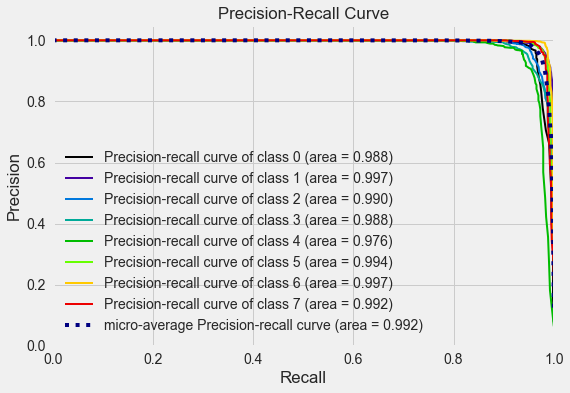

In [245]:
skplt.metrics.plot_precision_recall_curve(y_test, probas)

## Dealing with imbalanced 

In [180]:
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(x_train, y_train)

In [183]:
smote = rfclassifier.fit(X_train, y_train)
smote_pred = smote.predict(x_test)

In [185]:
print_accuracy_indices(y_test, smote_pred)

Precision Score: 0.9694130690619484
Recall Score: 0.9691667686284107
Accuracy Score: 0.9691667686284107
F1 Score: 0.9692103443585104


In [226]:
dict1= {'1':'Movies&Animation&Entertainment',
        '2':'Comedy', 
        '3':'STEM&nonprofit',
        '4':'News&Politics',
        '5':'Gaming&Sports',
        '6':'Music',
        '7':'STEM',
       '0':'People&Blogs'}

In [206]:
df = df2.loc[df2['catId'] != -1]

In [208]:
df.catId.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [234]:
cm = skm.multilabel_confusion_matrix(y_test, rfy_pred)
print(cm)
print( skm.classification_report(y_test,rfy_pred))

[[[7490   39]
  [  45  587]]

 [[5562  198]
  [  65 2336]]

 [[7232   40]
  [  71  818]]

 [[7274   61]
  [  72  754]]

 [[7611   30]
  [  40  480]]

 [[7566    8]
  [  47  540]]

 [[6827   25]
  [  36 1273]]

 [[7130   34]
  [  59  938]]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       632
           1       0.92      0.97      0.95      2401
           2       0.95      0.92      0.94       889
           3       0.93      0.91      0.92       826
           4       0.94      0.92      0.93       520
           5       0.99      0.92      0.95       587
           6       0.98      0.97      0.98      1309
           7       0.97      0.94      0.95       997

    accuracy                           0.95      8161
   macro avg       0.95      0.94      0.94      8161
weighted avg       0.95      0.95      0.95      8161



In [227]:
lists = sorted(dict1.items()) # sorted by key, return a list of tuples
x, y = zip(*lists)

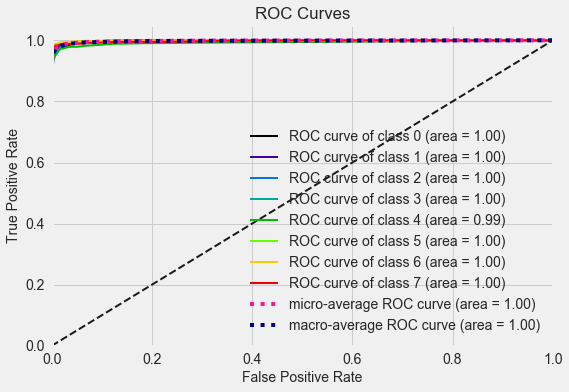

In [246]:
skplt.metrics.plot_roc(y_test, probas)

TypeError: len() of unsized object

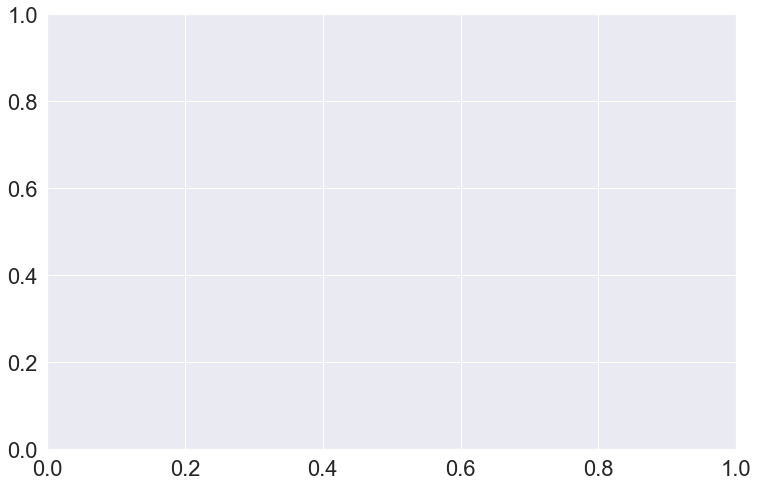

In [232]:
skplt.metrics.plot_confusion_matrix(y_test, rfy_pred, labels= None, 
                                    true_labels=dict1.values, pred_labels=dict1.values,
                                    title=None, 
                                    normalize=False, hide_zeros=False, hide_counts=False, x_tick_rotation=0, ax=None, figsize=None, cmap='Blues', title_fontsize='large', text_fontsize='medium')

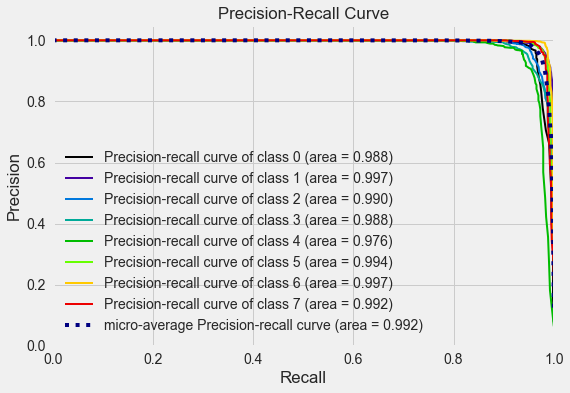

In [248]:
skplt.metrics.plot_precision_recall(y_test, probas, title='Precision-Recall Curve', plot_micro=True, classes_to_plot=None, ax=None, figsize=None, cmap='nipy_spectral', title_fontsize='large', text_fontsize='medium')